In [158]:
import pandas as pd
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt
import tensorflow as tf

In [174]:
mnist = tf.keras.datasets.mnist   #load en 28x28 billede
(x_train,y_train),(x_test,y_test) = mnist.load_data()

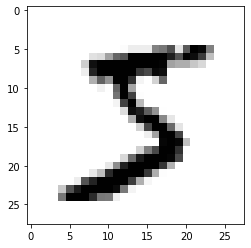

In [154]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [175]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [161]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer= 'adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 1.7849 - accuracy: 0.8798
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3320 - accuracy: 0.9345
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2093 - accuracy: 0.9477


In [162]:
val_loss,val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2221 - accuracy: 0.9432
0.22208738327026367 0.9431999921798706


In [165]:
model.save('num_reader.model')

INFO:tensorflow:Assets written to: num_reader.model\assets


In [167]:
new_model = tf.keras.models.load_model('num_reader.model')

In [169]:
predictions = new_model.predict([x_test])

313/313 [==============================] - 1s 2ms/step


In [183]:
print(np.argmax(predictions[0]))

7


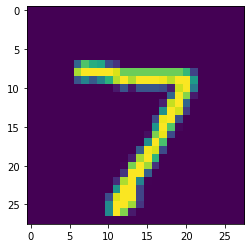

In [184]:
plt.imshow(x_test[0])